Model 1

In [30]:
import pickle
from sklearn import svm
import scipy
import numpy as np
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectFpr
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import KernelPCA
from sklearn.feature_extraction import text
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier

In [2]:
train_name = scipy.sparse.load_npz('recipe_text_features_countvec/train_name_vec.npz')
test_name = scipy.sparse.load_npz('recipe_text_features_countvec/test_name_vec.npz')

train_steps = scipy.sparse.load_npz('recipe_text_features_countvec/train_steps_vec.npz')
test_steps = scipy.sparse.load_npz('recipe_text_features_countvec/test_steps_vec.npz')

train_ingredients = scipy.sparse.load_npz('recipe_text_features_countvec/train_ingr_vec.npz')
test_ingredients = scipy.sparse.load_npz('recipe_text_features_countvec/test_ingr_vec.npz')

train_data = pd.read_csv('recipe_train.csv')
train_num_steps = train_data.n_steps
train_num_ingr = train_data.n_ingredients
train_y_data = train_data.duration_label

test_data = pd.read_csv('recipe_test.csv')
test_num_steps = test_data.n_steps
test_num_ingr = test_data.n_ingredients

In [3]:
doc2vec50_train_name = np.genfromtxt('recipe_text_features_doc2vec50/train_name_doc2vec50.csv', delimiter=",")
doc2vec50_train_steps = np.genfromtxt('recipe_text_features_doc2vec50/train_steps_doc2vec50.csv', delimiter=",")
doc2vec50_train_ingr = np.genfromtxt('recipe_text_features_doc2vec50/train_ingr_doc2vec50.csv', delimiter=",")

doc2vec50_test_name = np.genfromtxt('recipe_text_features_doc2vec50/test_name_doc2vec50.csv', delimiter=",")
doc2vec50_test_steps = np.genfromtxt('recipe_text_features_doc2vec50/test_steps_doc2vec50.csv', delimiter=",")
doc2vec50_test_ingr = np.genfromtxt('recipe_text_features_doc2vec50/test_ingr_doc2vec50.csv', delimiter=",")

doc2vec100_train_name = np.genfromtxt('recipe_text_features_doc2vec100/train_name_doc2vec100.csv', delimiter=",")
doc2vec100_train_steps = np.genfromtxt('recipe_text_features_doc2vec100/train_steps_doc2vec100.csv', delimiter=",")
doc2vec100_train_ingr = np.genfromtxt('recipe_text_features_doc2vec100/train_ingr_doc2vec100.csv', delimiter=",")

doc2vec100_test_name = np.genfromtxt('recipe_text_features_doc2vec100/test_name_doc2vec100.csv', delimiter=",")
doc2vec100_test_steps = np.genfromtxt('recipe_text_features_doc2vec100/test_steps_doc2vec100.csv', delimiter=",")
doc2vec100_test_ingr = np.genfromtxt('recipe_text_features_doc2vec100/test_ingr_doc2vec100.csv', delimiter=",")

In [4]:
doc_combined_train = np.hstack((doc2vec50_train_name, doc2vec50_train_steps, doc2vec50_train_ingr, \
                              doc2vec100_train_name, doc2vec100_train_steps, doc2vec100_train_ingr))

In [5]:
train_data, test_data, doc2vec_train, doc2vec_test  = train_test_split(train_data, doc_combined_train, random_state=1)

In [6]:
train_y, test_y = train_data.duration_label, test_data.duration_label

In [7]:
model = RandomForestClassifier(verbose=True, n_jobs=-1, n_estimators=500, criterion = 'entropy')
model.fit(doc2vec_train, train_y)
model.score(doc2vec_test, test_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   26.3s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.2s
[Parallel(n_jobs=24)]: Done 500 out of 500 | elapsed:    0.2s finished


0.6897

In [23]:
doc2vec_preds_test = model.predict(doc2vec_test)
doc2vec_preds_train = model.predict(doc2vec_train)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.3s
[Parallel(n_jobs=24)]: Done 500 out of 500 | elapsed:    0.4s finished


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

About 70% accuracy

In [11]:
report = classification_report(model.predict(doc2vec_test), test_y)
print(report)

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed:    0.2s


              precision    recall  f1-score   support

         1.0       0.61      0.74      0.67      3663
         2.0       0.84      0.66      0.74      6337
         3.0       0.00      0.00      0.00         0

    accuracy                           0.69     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.75      0.69      0.71     10000



[Parallel(n_jobs=24)]: Done 500 out of 500 | elapsed:    0.2s finished
/home/robert/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/robert/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/robert/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

In [12]:
model2 = CatBoostClassifier(verbose=True, depth=6)
model2.fit(doc2vec_train, train_y)
report = classification_report(model2.predict(doc2vec_test), test_y)
print(report)

Learning rate set to 0.094114
0:	learn: 1.0546434	total: 116ms	remaining: 1m 55s
1:	learn: 1.0193862	total: 189ms	remaining: 1m 34s
2:	learn: 0.9861007	total: 260ms	remaining: 1m 26s
3:	learn: 0.9574545	total: 335ms	remaining: 1m 23s
4:	learn: 0.9333508	total: 403ms	remaining: 1m 20s
5:	learn: 0.9118288	total: 476ms	remaining: 1m 18s
6:	learn: 0.8933495	total: 550ms	remaining: 1m 18s
7:	learn: 0.8758183	total: 628ms	remaining: 1m 17s
8:	learn: 0.8604331	total: 703ms	remaining: 1m 17s
9:	learn: 0.8466693	total: 776ms	remaining: 1m 16s
10:	learn: 0.8347717	total: 852ms	remaining: 1m 16s
11:	learn: 0.8249755	total: 916ms	remaining: 1m 15s
12:	learn: 0.8155111	total: 981ms	remaining: 1m 14s
13:	learn: 0.8068487	total: 1.04s	remaining: 1m 13s
14:	learn: 0.7991296	total: 1.11s	remaining: 1m 12s
15:	learn: 0.7917706	total: 1.17s	remaining: 1m 12s
16:	learn: 0.7849910	total: 1.24s	remaining: 1m 11s
17:	learn: 0.7790537	total: 1.31s	remaining: 1m 11s
18:	learn: 0.7742540	total: 1.37s	remaining:

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
name_vec = CountVectorizer(stop_words="english")
steps_vec = CountVectorizer(stop_words="english")
ingr_vec = CountVectorizer(stop_words="english")

In [18]:
print("Start")
name_train =name_vec.fit_transform(train_data.name)
name_test = name_vec.transform(test_data.name)
print(1)

steps_train = steps_vec.fit_transform(train_data.steps)
steps_test = steps_vec.transform(test_data.steps)
print(2)

ingr_train = ingr_vec.fit_transform(train_data.ingredients)
ingr_test = ingr_vec.transform(test_data.ingredients)
print("Ending")

Start
1
2
Ending


In [19]:
clf = SelectFpr(chi2, alpha=0.001)
name_t_train = clf.fit_transform(name_train, train_y)
name_t_test = clf.transform(name_test)
clf = SelectKBest(mutual_info_classif, k=100)
name_t_train = clf.fit_transform(name_t_train, train_y)
name_t_test = clf.transform(name_t_test)

In [20]:
clf = SelectFpr(chi2, alpha=0.001)
steps_t_train = clf.fit_transform(steps_train, train_y)
steps_t_test = clf.transform(steps_test)
clf = SelectKBest(mutual_info_classif, k=150)
steps_t_train = clf.fit_transform(steps_t_train, train_y)
steps_t_test = clf.transform(steps_t_test)

In [21]:
clf = SelectFpr(chi2, alpha=0.001)
ingr_t_train = clf.fit_transform(ingr_train, train_y)
ingr_t_test = clf.transform(ingr_test)
clf = SelectKBest(mutual_info_classif, k=100)
ingr_t_train = clf.fit_transform(ingr_t_train, train_y)
ingr_t_test = clf.transform(ingr_t_test)

In [24]:
train_vec = scipy.sparse.hstack((name_t_train, steps_t_train, ingr_t_train, doc2vec_preds_train.reshape(30000, 1)))

test_vec = scipy.sparse.hstack((name_t_test, steps_t_test, ingr_t_test, doc2vec_preds_test.reshape(10000, 1)))

In [28]:
clf = SGDClassifier(n_jobs=-1,verbose=True)
clf.fit(train_vec, train_y)
clf.score(test_vec, test_y)

-- Epoch 1
-- Epoch 1-- Epoch 1

Norm: 52.70, NNZs: 350, Bias: -22.626211, T: 30000, Avg. loss: 9.428264
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 50.00, NNZs: 346, Bias: -7.173359, T: 30000, Avg. loss: 2.082752
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 49.13, NNZs: 348, Bias: 26.415586, T: 30000, Avg. loss: 6.657660
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 34.87, NNZs: 351, Bias: -23.728623, T: 60000, Avg. loss: 1.324861
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.60, NNZs: 350, Bias: -7.954931, T: 60000, Avg. loss: 0.359049
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 31.11, NNZs: 349, Bias: 27.406218, T: 60000, Avg. loss: 0.284166
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 27.18, NNZs: 351, Bias: -23.843733, T: 90000, Avg. loss: 0.707689
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 17.35, NNZs: 350, Bias: -8.327430, T: 90000, Avg. loss: 0.266071
Total training time: 0.01 seconds.
-- Epoch 4Norm: 25.02, NNZs: 349, Bias:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.7115

In [29]:
report = classification_report(clf.predict(test_vec), test_y)
print(report)

              precision    recall  f1-score   support

         1.0       0.61      0.74      0.67      3695
         2.0       0.81      0.70      0.75      5817
         3.0       0.56      0.64      0.60       488

    accuracy                           0.71     10000
   macro avg       0.66      0.69      0.67     10000
weighted avg       0.73      0.71      0.72     10000



In [33]:
matric = confusion_matrix(clf.predict(test_vec), test_y)
print(matric)

[[2717  833  145]
 [1635 4087   95]
 [  75  102  311]]


Confusion matrix, without normalization
[[2717 1635   75]
 [ 833 4087  102]
 [ 145   95  311]]
Normalized confusion matrix
[[0.61373391 0.3693246  0.0169415 ]
 [0.16587017 0.8138192  0.02031063]
 [0.26315789 0.17241379 0.56442831]]


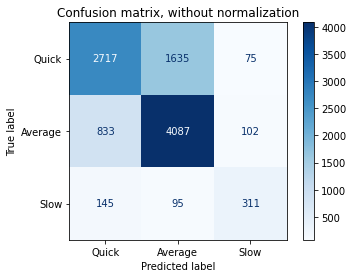

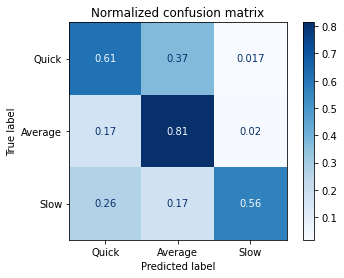

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# code from sklearn documentaion.
class_names = ["Quick", "Average", "Slow"]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_vec, test_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('Model 1 with doc2vec.png', bbox_inches='tight', dpi=150)
plt.show()

In [48]:
train_vec = scipy.sparse.hstack((name_t_train, steps_t_train, ingr_t_train))

test_vec = scipy.sparse.hstack((name_t_test, steps_t_test, ingr_t_test))

In [49]:
clf = CatBoostClassifier(depth=8, verbose=True)
clf.fit(train_vec, train_y)
clf.score(test_vec, test_y)

Learning rate set to 0.094114
0:	learn: 1.0192118	total: 23.2ms	remaining: 23.1s
1:	learn: 0.9551774	total: 42.6ms	remaining: 21.3s
2:	learn: 0.9034541	total: 62.2ms	remaining: 20.7s
3:	learn: 0.8575734	total: 81.9ms	remaining: 20.4s
4:	learn: 0.8197426	total: 101ms	remaining: 20.1s
5:	learn: 0.7869733	total: 120ms	remaining: 19.8s
6:	learn: 0.7575707	total: 139ms	remaining: 19.7s
7:	learn: 0.7318374	total: 160ms	remaining: 19.9s
8:	learn: 0.7081440	total: 179ms	remaining: 19.7s
9:	learn: 0.6873994	total: 199ms	remaining: 19.7s
10:	learn: 0.6700050	total: 219ms	remaining: 19.7s
11:	learn: 0.6550453	total: 243ms	remaining: 20s
12:	learn: 0.6410572	total: 262ms	remaining: 19.9s
13:	learn: 0.6279248	total: 282ms	remaining: 19.8s
14:	learn: 0.6158477	total: 306ms	remaining: 20.1s
15:	learn: 0.6041327	total: 328ms	remaining: 20.2s
16:	learn: 0.5939779	total: 348ms	remaining: 20.1s
17:	learn: 0.5843416	total: 368ms	remaining: 20.1s
18:	learn: 0.5762804	total: 389ms	remaining: 20.1s
19:	learn

0.8086

Confusion matrix, without normalization
[[3635  768   24]
 [ 856 4107   59]
 [  88  119  344]]
Normalized confusion matrix
[[0.82109781 0.17348091 0.00542128]
 [0.17045002 0.81780167 0.01174831]
 [0.15970962 0.21597096 0.62431942]]


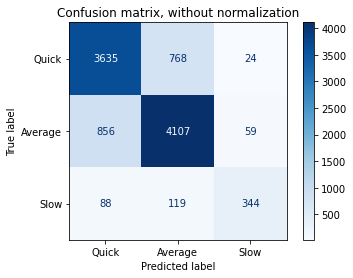

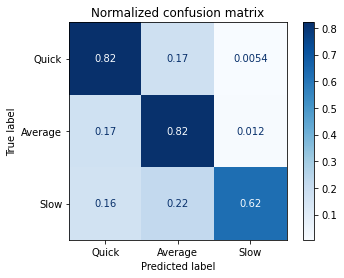

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# code from sklearn documentaion.
class_names = ["Quick", "Average", "Slow"]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_vec, test_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('Model 1 without doc2vec.png', bbox_inches='tight', dpi=150)
plt.show()

In [52]:
train_1 = train_data['duration_label'].replace(3.0, 2.0)
train_2 = train_data['duration_label'].replace(1.0, 2.0)
test_1 = test_data['duration_label'].replace(3.0, 2.0)
test_2 = test_data['duration_label'].replace(1.0, 2.0)

In [54]:
train_vec = scipy.sparse.hstack((name_t_train, steps_t_train, ingr_t_train))
test_vec = scipy.sparse.hstack((name_t_test, steps_t_test, ingr_t_test))

In [120]:
clf = SelectFpr(chi2, alpha=0.05)
train_vec = clf.fit_transform(train_vec, train_1)
test_vec = clf.transform(test_vec)

In [149]:
clf = CatBoostClassifier(depth=8)
clf.fit(train_vec, train_1)
clf.score(test_vec, test_1)
preds_1_1 = clf.predict(test_vec)

Learning rate set to 0.044021
0:	learn: 0.6730172	total: 11.4ms	remaining: 11.3s
1:	learn: 0.6569277	total: 22.9ms	remaining: 11.4s
2:	learn: 0.6415698	total: 33.9ms	remaining: 11.3s
3:	learn: 0.6291701	total: 44.6ms	remaining: 11.1s
4:	learn: 0.6162626	total: 55.4ms	remaining: 11s
5:	learn: 0.6051514	total: 67.1ms	remaining: 11.1s
6:	learn: 0.5950181	total: 79.8ms	remaining: 11.3s
7:	learn: 0.5854141	total: 90.5ms	remaining: 11.2s
8:	learn: 0.5764142	total: 102ms	remaining: 11.3s
9:	learn: 0.5672247	total: 113ms	remaining: 11.2s
10:	learn: 0.5610978	total: 124ms	remaining: 11.2s
11:	learn: 0.5538161	total: 135ms	remaining: 11.2s
12:	learn: 0.5478631	total: 147ms	remaining: 11.2s
13:	learn: 0.5421864	total: 158ms	remaining: 11.1s
14:	learn: 0.5360340	total: 169ms	remaining: 11.1s
15:	learn: 0.5300358	total: 179ms	remaining: 11s
16:	learn: 0.5257418	total: 191ms	remaining: 11s
17:	learn: 0.5208006	total: 202ms	remaining: 11s
18:	learn: 0.5164782	total: 212ms	remaining: 10.9s
19:	learn: 

Confusion matrix, without normalization
[[3560  867]
 [ 972 4601]]
Normalized confusion matrix
[[0.80415631 0.19584369]
 [0.17441235 0.82558765]]


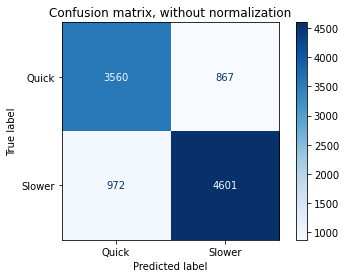

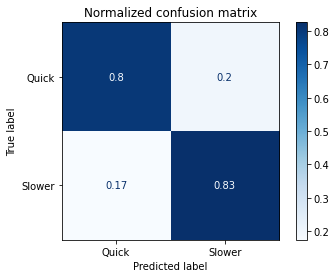

In [126]:
class_names = ["Quick", "Slower"]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_vec, test_1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('quick_v_all_cat.png', bbox_inches='tight', dpi=150)
plt.show()

In [127]:
clf = SelectFpr(chi2, alpha=0.05)
train_vec = clf.fit_transform(train_vec, train_2)
test_vec = clf.transform(test_vec)


In [150]:
clf = CatBoostClassifier(depth=8)
clf.fit(train_vec, train_2)
clf.score(test_vec, test_2)
preds_2_1 = clf.predict(test_vec)

Learning rate set to 0.044021
0:	learn: 0.6001238	total: 11.2ms	remaining: 11.2s
1:	learn: 0.5217561	total: 20.5ms	remaining: 10.2s
2:	learn: 0.4556613	total: 31.8ms	remaining: 10.6s
3:	learn: 0.3985142	total: 41.2ms	remaining: 10.3s
4:	learn: 0.3645285	total: 50.2ms	remaining: 9.98s
5:	learn: 0.3218338	total: 60.5ms	remaining: 10s
6:	learn: 0.2977432	total: 69.1ms	remaining: 9.8s
7:	learn: 0.2658800	total: 79ms	remaining: 9.8s
8:	learn: 0.2471131	total: 87.5ms	remaining: 9.63s
9:	learn: 0.2236444	total: 96.3ms	remaining: 9.53s
10:	learn: 0.2105306	total: 103ms	remaining: 9.26s
11:	learn: 0.1972664	total: 112ms	remaining: 9.21s
12:	learn: 0.1863261	total: 121ms	remaining: 9.16s
13:	learn: 0.1718639	total: 130ms	remaining: 9.17s
14:	learn: 0.1594886	total: 140ms	remaining: 9.18s
15:	learn: 0.1476689	total: 149ms	remaining: 9.19s
16:	learn: 0.1413236	total: 159ms	remaining: 9.18s
17:	learn: 0.1334184	total: 169ms	remaining: 9.23s
18:	learn: 0.1292766	total: 178ms	remaining: 9.21s
19:	lea

Confusion matrix, without normalization
[[9390   59]
 [ 226  325]]
Normalized confusion matrix
[[0.99375595 0.00624405]
 [0.41016334 0.58983666]]


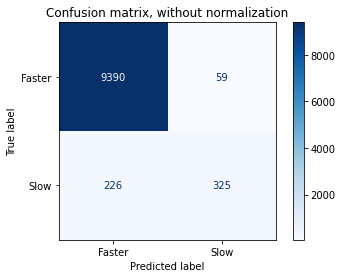

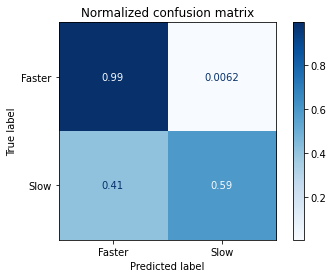

In [129]:
class_names = ["Faster", "Slow"]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_vec, test_2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('slow_v_all_cat.png', bbox_inches='tight', dpi=150)
plt.show()

In [130]:
ans = []
for i, j in zip(preds_1, preds_2):
    if i ==1 and j == 3:
        ans.append(2.0)
    elif i == 1:
        ans.append(1.0)
    elif j == 3:
        ans.append(3.0)
    else:
        ans.append(2.0)


In [131]:
import seaborn as sn
a

array([[0.78642494, 0.19588769, 0.01768738],
       [0.16816935, 0.80223442, 0.02959624],
       [0.032     , 0.11466667, 0.85333333]])

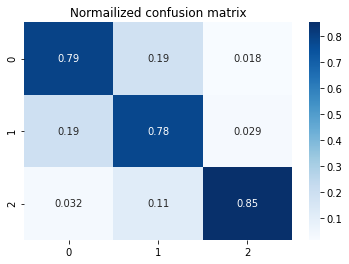

In [132]:
a = confusion_matrix(ans, test_y,normalize='true')
ax = plt.axes()
sn.heatmap(a, annot=True, cmap=plt.cm.Blues)
ax.set_title("Normailized confusion matrix")
plt.savefig('combined_cat.png', bbox_inches='tight', dpi=150)
plt.show()

In [157]:
clf = SelectFpr(chi2, alpha=0.05)
train_vec = clf.fit_transform(train_vec, train_1)
test_vec = clf.transform(test_vec)

In [158]:
clf = RandomForestClassifier(verbose=True, n_jobs=-1)
clf.fit(train_vec, train_1)
clf.score(test_vec, test_1)
preds_1_2 = clf.predict(test_vec)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


Confusion matrix, without normalization
[[3373 1054]
 [ 883 4690]]
Normalized confusion matrix
[[0.76191552 0.23808448]
 [0.15844249 0.84155751]]


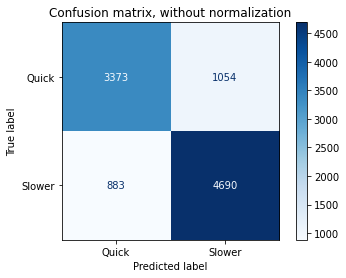

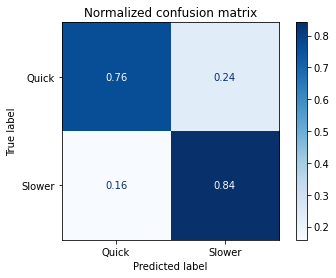

In [136]:
class_names = ["Quick", "Slower"]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_vec, test_1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('quick_v_all_forest.png', bbox_inches='tight', dpi=150)
plt.show()

In [137]:
clf = SelectFpr(chi2, alpha=0.05)
train_vec = clf.fit_transform(train_vec, train_2)
test_vec = clf.transform(test_vec)

In [152]:
clf = RandomForestClassifier(verbose=True, n_jobs=-1)
clf.fit(train_vec, train_2)
clf.score(test_vec, test_2)
preds_2_2 = clf.predict(test_vec)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


Confusion matrix, without normalization
[[9413   36]
 [ 264  287]]
Normalized confusion matrix
[[0.99619007 0.00380993]
 [0.47912886 0.52087114]]


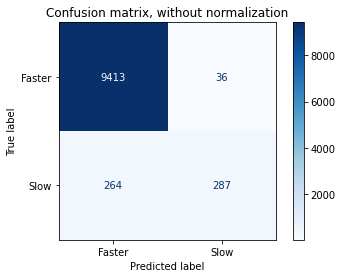

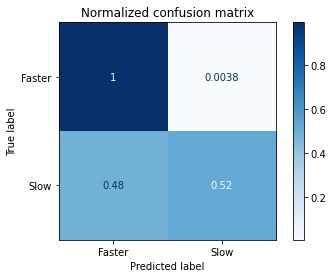

In [142]:
class_names = ["Faster", "Slow"]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_vec, test_2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('slow_v_all_forest.png', bbox_inches='tight', dpi=150)
plt.show()

In [147]:
ans = []
for i, j in zip(preds_1_2, preds_2_2):
    if i ==1 and j == 3:
        ans.append(2.0)
    elif i == 1:
        ans.append(1.0)
    elif j == 3:
        ans.append(3.0)
    else:
        ans.append(2.0)


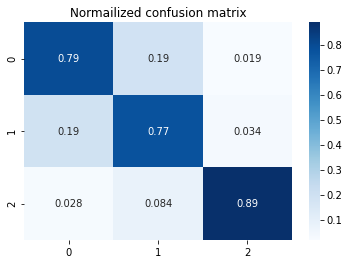

In [148]:
a = confusion_matrix(ans, test_y,normalize='true')
ax = plt.axes()
sn.heatmap(a, annot=True, cmap=plt.cm.Blues)
ax.set_title("Normailized confusion matrix")
plt.savefig('combined_forest.png', bbox_inches='tight', dpi=150)
plt.show()

In [163]:
ans = []
for i, j, k, l in zip(preds_1_1, preds_2_1, preds_1_2, preds_2_2):
    if (i == 1.0 and k == 1.0) and (j == 3.0 and k == 3.):
        ans.append(2.0)
    elif i == 1.0 and k == 1.0:
        ans.append(1.0)
    elif j == 3.0 and k == 3.0:
        ans.append(3.0)
    else:
        ans.append(2.0)


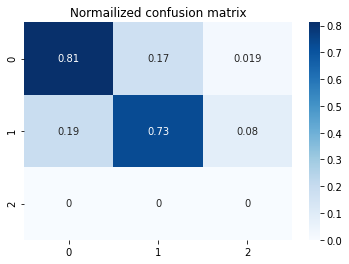

In [164]:
a = confusion_matrix(ans, test_y,normalize='true')
ax = plt.axes()
sn.heatmap(a, annot=True, cmap=plt.cm.Blues)
ax.set_title("Normailized confusion matrix")
#plt.savefig('combined_forest.png', bbox_inches='tight', dpi=150)
plt.show()

In [160]:
preds_2_1

array([2., 2., 2., ..., 2., 2., 2.])